### 라이브러리 불러오기

In [63]:
#Load all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import datetime as dt
import matplotlib.image as mpimg

In [225]:

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

In [212]:
# 컬러 프리셋
facecolor = '#DADBBD'
sup_facecolor = '#6EBF8B'
plotcolor = '#D82148'
fontcolor = '#151D3B'
sns.set(rc={'axes.facecolor':facecolor})
colors = sns.color_palette('Dark2')

### 데이터 전처리

In [3]:
articles = pd.read_csv('../git/Datasets/articles.csv')
customers = pd.read_csv('../git/Datasets/customers.csv')
transactions = pd.read_csv('../git/Datasets/transactions_train.csv')


In [6]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

In [7]:
side_by_side(articles.isnull().sum(), articles.nunique())

article_id                        0    article_id                      105542
product_code                      0    product_code                     47224
prod_name                         0    prod_name                        45875
product_type_no                   0    product_type_no                    132
product_type_name                 0    product_type_name                  131
product_group_name                0    product_group_name                  19
graphical_appearance_no           0    graphical_appearance_no             30
graphical_appearance_name         0    graphical_appearance_name           30
colour_group_code                 0    colour_group_code                   50
colour_group_name                 0    colour_group_name                   50
perceived_colour_value_id         0    perceived_colour_value_id            8
perceived_colour_value_name       0    perceived_colour_value_name          8
perceived_colour_master_id        0    perceived_colour_master_i

In [8]:
side_by_side(customers.isnull().sum(), customers.nunique())

customer_id                    0    customer_id               1371980
FN                        895050    FN                              1
Active                    907576    Active                          1
club_member_status          6062    club_member_status              3
fashion_news_frequency     16009    fashion_news_frequency          4
age                        15861    age                            84
postal_code                    0    postal_code                352899
dtype: int64                        dtype: int64                     



In [10]:
side_by_side(transactions.isnull().sum(), transactions.nunique())

t_dat               0    t_dat                   734
customer_id         0    customer_id         1362281
article_id          0    article_id           104547
price               0    price                  9857
sales_channel_id    0    sales_channel_id          2
dtype: int64             dtype: int64               



In [5]:
print("articles shape : ",articles.shape,"\ncustomers shape : ", customers.shape, "\ntransactions shape : ", transactions.shape)

articles shape :  (105542, 25) 
customers shape :  (1371980, 7) 
transactions shape :  (31788324, 5)


article dataset 에서 article_id를 제외한 _no, _code, _id 가 들어간 칼럼들을 제거해주었다. 

In [23]:
article_delete = ['_no','_code','_id']
articles_clean = articles.loc[:,~articles.columns.str.contains('|'.join(article_delete), case =False)]
articles_clean.insert(0, 'article_id', articles['article_id'])
articles_clean.sample(5)

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
21343,593783005,JACKIE TEE,T-shirt,Garment Upper body,Stripe,White,Light,White,Young Girl Jersey Basic,Children Sizes 134-170,Baby/Children,Girls Underwear & Basics,Jersey Basic,Wide top in soft cotton and modal jersey with ...
50900,697688001,Merino 2 p sock,Socks,Socks & Tights,Solid,Black,Dark,Black,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Socks in soft, fine-knit merino wool with elas..."
622,270381001,Clubba sunglasses,Sunglasses,Accessories,Solid,Yellowish Brown,Dark,Brown,Sunglasses,Ladies Accessories,Ladieswear,Womens Small accessories,Accessories,Sunglasses with plastic and metal frames and t...
5250,493438012,Leo seamless t-shirt (1),T-shirt,Garment Upper body,Melange,Black,Dark,Black,Ladies Sport Bras,Sport,Sport,Ladies H&M Sport,Jersey Fancy,NaN
66233,747197001,Barcelona jumpsuit,Jumpsuit/Playsuit,Garment Full body,All over pattern,Black,Dark,Black,Dresses,Divided,Divided,Divided Collection,Dresses Ladies,Playsuit in a patterned viscose weave with nar...


transcations 의 't_dat' 을 datetime 으로 바꾸어 주었다

In [45]:
transactions.info()
display(transactions.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


,t_dat,customer_id,article_id,price,sales_channel_id
23964504,2020-04-01,c35b93f19925a156bae0424cf4c52fe3be4ee59e270527...,714790008,0.028797,2
14403053,2019-07-24,6097a675666116b58f607a70363bca6076713ea5df4b47...,697564001,0.006763,1
20616193,2019-12-26,234d3dbfe20870ca96a683c90a4c4d1f2c9df74a039dfa...,536139012,0.010153,2
21675079,2020-01-26,3fe4ba45acf3eb7c5e71f50be0a965669a7711255d9950...,814763004,0.019814,2
11123911,2019-05-31,9e1ed72657aa09d69a642573e4feb213b2a71f4badc00d...,399256005,0.016932,2


### H & M 거래량 트렌드
- 2년간의 회사의 거래량 변화
- 비정상적 매출 감지

In [46]:
transactions['t_dat'] =pd.to_datetime(transactions['t_dat'], format='%Y/%m/%d')
print("데이터 측정기간은 ", transactions['t_dat'].min(),"에서 ", transactions['t_dat'].max(), "입니다")

데이터 측정기간은  2018-09-20 00:00:00 에서  2020-09-22 00:00:00 입니다


위에서 알 수 있다시피 transactions 데이터셋은 2년간의 거래내역을 가지고 있다.

In [71]:
trans_time=transactions.groupby('t_dat').sum()[['price']].reset_index()


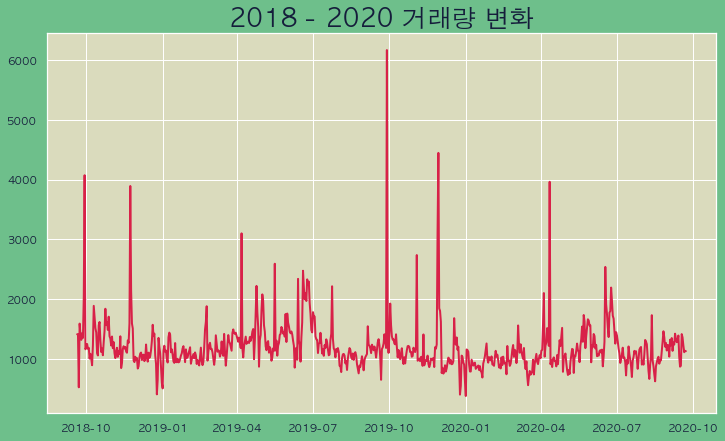

In [102]:
# trans_time.head()
trans_time = trans_time.sort_values('t_dat')

fig, ax = plt.subplots(facecolor= sup_facecolor)
fig.set_size_inches(12,7)
ax.plot('t_dat', 'price', data=trans_time, color='#D82148', linewidth=2)
ax.set_title('2018 - 2020 거래량 변화', color = fontcolor, size = 25, fontweight = 'bold')
plt.xticks(color = fontcolor, fontweight = 'bold')
plt.yticks(color = fontcolor, fontweight = 'bold')
plt.show()

그래프를 출력했을때 비정상적으로 매출이 높은 날들이 보인다

In [99]:
trans_time.sort_values('price', ascending = False).head()

,t_dat,price
373,2019-09-28,6161.603068
435,2019-11-29,4444.342390
9,2018-09-29,4071.381305
569,2020-04-11,3961.987763
64,2018-11-23,3891.939441


상위 5개의 최대 매출을 올린 날짜는 이러하다. 이 날짜에 어떠한 이벤트가 있었는지 추후에 조사하면 좋을 것 같다 

### 세일즈 채널별 거래량 변화 추이

In [369]:
trans_sales_ch = transactions.groupby(['t_dat','sales_channel_id']).count()[['article_id']].reset_index()
trans_sales_ch.head()



,t_dat,sales_channel_id,article_id
0,2018-09-20,1,12656
1,2018-09-20,2,35743
2,2018-09-21,1,13848
3,2018-09-21,2,33695
4,2018-09-22,1,7735


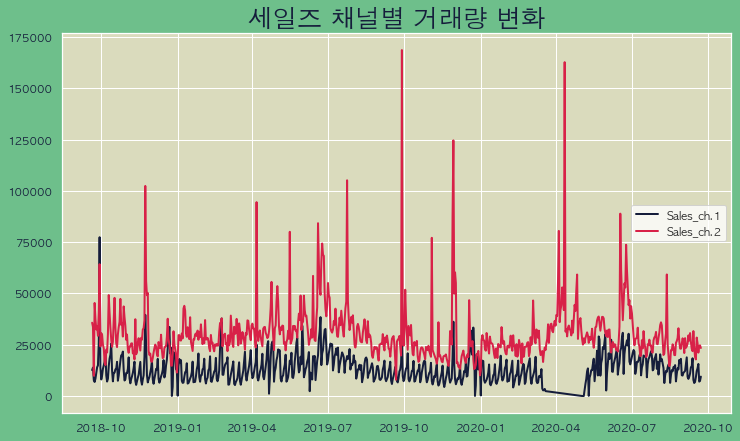

In [380]:
fig, ax = plt.subplots(facecolor= sup_facecolor)
fig.set_size_inches(12,7)
ax.plot(trans_sales_ch.loc[trans_sales_ch['sales_channel_id'] == 1, 't_dat'],
        trans_sales_ch.loc[trans_sales_ch['sales_channel_id'] == 1, 'article_id'],
        label = 'Sales_ch.1', color=fontcolor, linewidth=2)

ax.plot(trans_sales_ch.loc[trans_sales_ch['sales_channel_id'] == 2, 't_dat'],
        trans_sales_ch.loc[trans_sales_ch['sales_channel_id'] == 2, 'article_id'],
        label = 'Sales_ch.2', color=plotcolor, linewidth=2)

ax.set_title('세일즈 채널별 거래량 변화', color = fontcolor, size = 25, fontweight = 'bold')

plt.legend(loc = 'right', facecolor = 'white')
plt.xticks(color = fontcolor, fontweight = 'bold')
plt.yticks(color = fontcolor, fontweight = 'bold')
plt.show()

채널 1은 2018년도 10월부터 비교적 변동성이 적은 거래량을 보였다

채널 2는 특정 요일날 눈에띄는 거래량 증가를 보이며 변동성이 매우 큰 패턴을 보였다.

앞에서 알아보았던 전체 거래량 그래프에서 피크들은 18년 10월 이후로는 모두 채널 2에서 발생하였다

채널 1에서 20년 3월 ~5월 즈음까지 거래량이 급감하였고 곧 0에 수렴하였다

### H & M 상위 매출 제품군(product_group)
- 매출 제품군 distribution 파악
- 파악한 distribution을 index_group 으로 재분류

In [425]:
best_product = pd.DataFrame(transactions, columns = ['article_id', 'price'])
best_article_merge = pd.DataFrame(articles, columns = ['article_id', 'product_group_name',
                                                       'index_group_name', 'colour_group_name',
                                                       'garment_group_name'])
trans_article = pd.merge(best_product,best_article_merge, how='left', on='article_id')

In [384]:
best_product_grouped = trans_article.groupby('product_group_name').sum()[['price']].sort_values('price', ascending = False).reset_index()

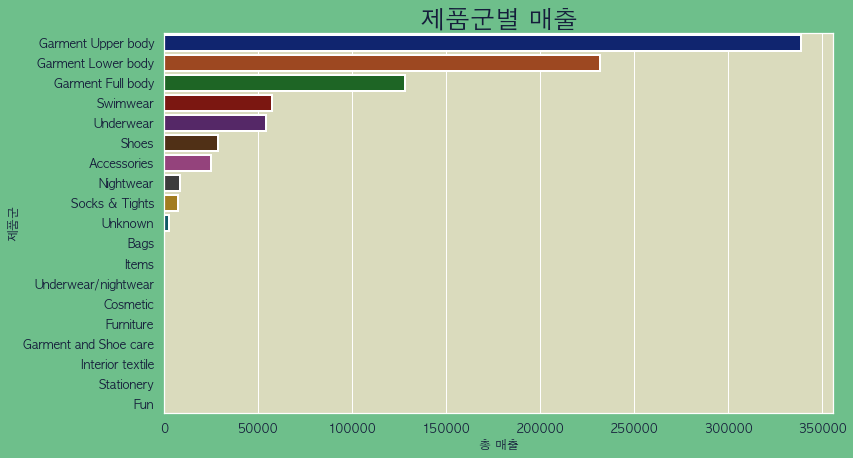

In [227]:
fig, ax = plt.subplots(facecolor= sup_facecolor)
fig.set_size_inches(12,7)
sns.barplot(data=best_product_grouped, x = 'price' , y = 'product_group_name', palette = 'dark', linewidth=2)
plt.title('제품군별 매출', color = fontcolor, size = 25, fontweight = 'bold')
plt.xlabel('총 매출', color = fontcolor, fontweight = 'bold')
plt.ylabel('제품군', color = fontcolor, fontweight = 'bold')
plt.xticks(color = fontcolor, fontweight = 'bold', size =12)
plt.yticks(color = fontcolor, fontweight = 'bold', size =12)
plt.show()

가장 많은 매출을 올린 상위 3개의 제품군은 크게 놀라운 결과는 아니였다. 상의(upper body),하의(lower body),한벌옷(full body) 가 주를 이루었다


In [388]:
best_product_index = trans_article.groupby(['product_group_name', 'index_group_name']).sum()[['price']].sort_values('price', ascending = False).reset_index()

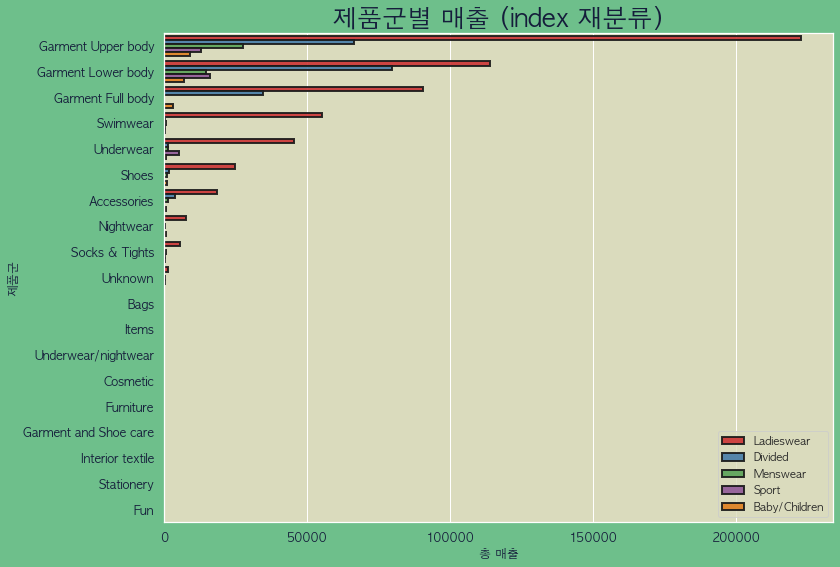

In [414]:
fig, ax = plt.subplots(facecolor= sup_facecolor)
fig.set_size_inches(12,9)
sns.barplot(data=best_product_index, x = 'price' , y = 'product_group_name', 
            hue = 'index_group_name', palette = 'Set1',
            alpha = 0.9, edgecolor = 'k', linewidth=2)
plt.title('제품군별 매출 (index 재분류)', color = fontcolor, size = 25, fontweight = 'bold')
plt.xlabel('총 매출', color = fontcolor, fontweight = 'bold')
plt.ylabel('제품군', color = fontcolor, fontweight = 'bold')
plt.xticks(color = fontcolor, fontweight = 'bold', size =12)
plt.yticks(color = fontcolor, fontweight = 'bold', size =12)
plt.legend(loc = 'lower right')
plt.show()

모든 product_group 간에 가장 많은 비중을 차지하는것은 'Ladieswear' 였다

H&M 은 여성의류에서 부터 대부분의 매출이 발생한다고 정리될 수 있다

### 색상별 매출

In [435]:
colour_trans = trans_article.groupby('colour_group_name').sum()[['price']].reset_index()
colour_trans.sort_values('price',ascending = False, inplace = True )
colour_trans.head()

,colour_group_name,price
1,Black,309306.695322
47,White,76211.319271
5,Dark Blue,64068.098627
19,Light Beige,40494.175864
2,Blue,37909.094593


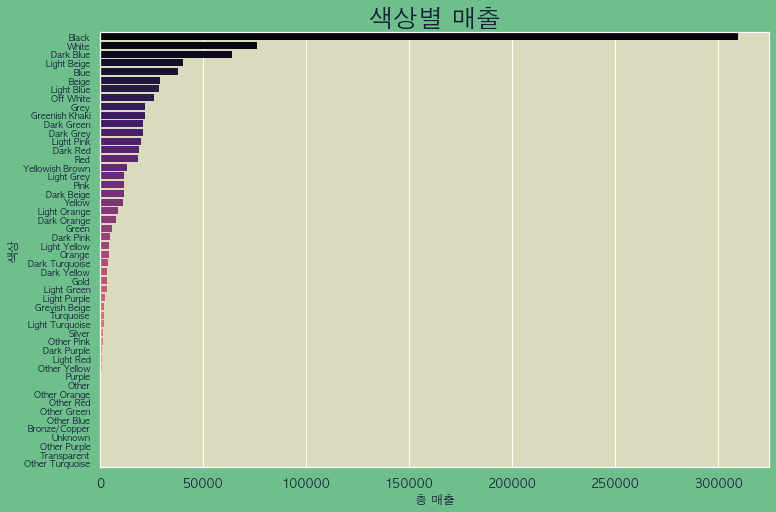

In [459]:
fig, ax = plt.subplots(facecolor= sup_facecolor)
fig.set_size_inches(12,8)
sns.barplot(data=colour_trans, x = 'price' , y = 'colour_group_name',
            palette = 'magma', edgecolor = 'none', linewidth=2)
plt.title('색상별 매출', color = fontcolor, size = 25, fontweight = 'bold')
plt.xlabel('총 매출', color = fontcolor, fontweight = 'bold')
plt.ylabel('색상', color = fontcolor, fontweight = 'bold')
plt.xticks(color = fontcolor, fontweight = 'bold', fontsize =12)
plt.yticks(color = fontcolor, fontweight = 'bold', fontsize =9)
plt.show()

검정색 제품의 매출이 압도적으로 크다

그 다음으로 선호되는 컬러는 흰색, 남색 이다



### 소비자 연령대별 분석
- 소비자 연령대 Range
- 소비자 연령대별 고객수, 구매 수량, 매출
- 소비자 연령대별 1인 평균 구매수량, 1인 평균 매출

In [135]:
#transaction를 groupby 하고 customer와 join, merge 해줬다
trans_grouped = transactions.groupby('customer_id').agg({'price':'sum', 'article_id':'count'}).reset_index()
customers_extract = pd.DataFrame(customers, 
                                 columns = ['customer_id', 'club_member_status', 
                                            'fashion_news_frequency', 'age', 'postal_code'])



In [139]:
trans_grouped.rename(columns = {'price': 'purchased_amt','article_id': 'purchased_item'}, inplace = True)
trans_cus_merged = pd.merge(customers_extract, trans_grouped, how = 'left', on = 'customer_id')
trans_cus_merged.head()

,customer_id,club_member_status,fashion_news_frequency,age,postal_code,purchased_amt,purchased_item
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.648983,21.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2.601932,86.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.704780,18.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.060983,2.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.469695,13.0


In [253]:
age_dist = trans_cus_merged.iloc[:,np.r_[:1,3,-1,-2]]
# age_dist.head()
print("최연소 고객은 ", age_dist['age'].min()," 세이고,\n최고령 고객은 ", age_dist['age'].max(), " 세 입니다")

최연소 고객은  16.0  세이고,
최고령 고객은  99.0  세 입니다


In [254]:
age_ranges = [10, 19, 29, 39, 49, 59, np.inf]
age_labels= ['10s', '20s', '30s', '40s', '50s', '60+']
# Create wait_type column
age_dist['age_group'] = pd.cut(age_dist['age'], bins = age_ranges, 
                                labels = age_labels);


/var/folders/yv/6l63hsjs7jsd6vjwgds3mhbw0000gn/T/ipykernel_55843/2989421229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_dist['age_group'] = pd.cut(age_dist['age'], bins = age_ranges,


In [278]:
age_grouped = age_dist.groupby('age_group').agg({'customer_id': 'count', 'purchased_item' : 'sum', 'purchased_amt': 'sum'}).reset_index()
age_grouped.rename(columns = {'customer_id': 'total_customer'}, inplace = True)
age_grouped

,age_group,total_customer,purchased_item,purchased_amt
0,10s,71583,691402.0,16295.417186
1,20s,528358,13058587.0,354464.338678
2,30s,234068,6428863.0,180220.576932
3,40s,204118,4908363.0,135460.247390
4,50s,226242,5136958.0,151040.965898
5,60+,91750,1423893.0,43359.937102


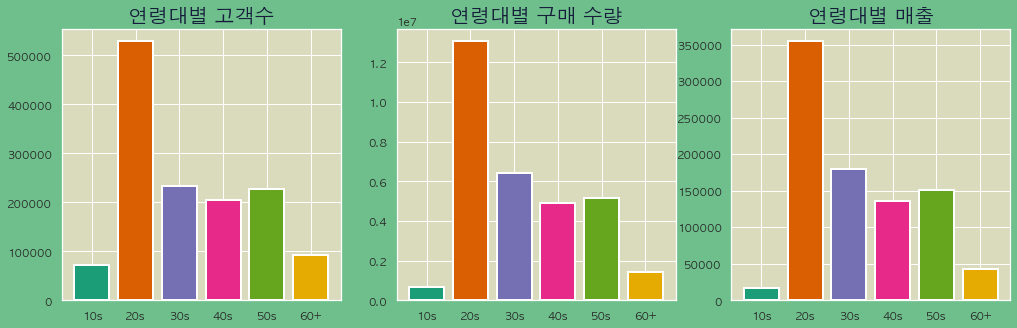

In [296]:
fig, ax = plt.subplots(1, 3, facecolor= sup_facecolor , squeeze = False)
fig.set_size_inches(17,5)

ax[0, 0].bar(age_grouped['age_group'], age_grouped['total_customer'], color= colors, linewidth=2)
ax[0, 0].set_title('연령대별 고객수', color = fontcolor, size = 20, fontweight = 'bold')

ax[0, 1].bar(age_grouped['age_group'], age_grouped['purchased_item'], color= colors, linewidth=2)
ax[0, 1].set_title('연령대별 구매 수량', color = fontcolor, size = 20, fontweight = 'bold')

ax[0, 2].bar(age_grouped['age_group'], age_grouped['purchased_amt'], color= colors, linewidth=2)
ax[0, 2].set_title('연령대별 매출', color = fontcolor, size = 20, fontweight = 'bold')

plt.show()

- H&M 소비자는 20대가 압도적으로 많았고 30,40,50 대가 고객 수가 비슷하게 나타나였다

- 연령대별 구매 수량, 매출은 소비자 수와 정비례한 양상을 보여줬다


In [290]:
age_grouped_avg = age_dist.groupby('age_group').agg({'customer_id': 'count', 'purchased_item' : 'mean', 'purchased_amt': 'mean'}).reset_index()
age_grouped_avg.rename(columns = {'customer_id': 'total_customer', 'purchased_item': 'avg_pur_item', 'purchased_amt': 'avg_pur_amt'}, inplace = True)
age_grouped_avg

,age_group,total_customer,avg_pur_item,avg_pur_amt
0,10s,71583,9.805452,0.231101
1,20s,528358,24.888290,0.675572
2,30s,234068,27.631533,0.774596
3,40s,204118,24.203331,0.667960
4,50s,226242,22.844631,0.671696
5,60+,91750,15.648208,0.476514


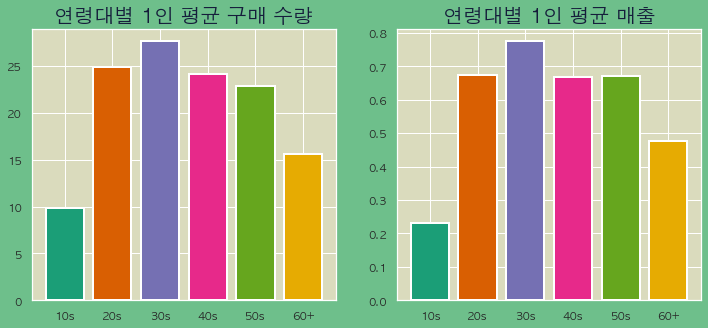

In [298]:
fig, ax = plt.subplots(1, 2, facecolor= sup_facecolor , squeeze = False)
fig.set_size_inches(12,5)

ax[0, 0].bar(age_grouped_avg['age_group'], age_grouped_avg['avg_pur_item'], color= colors, linewidth=2)
ax[0, 0].set_title('연령대별 1인 평균 구매 수량', color = fontcolor, size = 20, fontweight = 'bold')

ax[0, 1].bar(age_grouped_avg['age_group'], age_grouped_avg['avg_pur_amt'], color= colors, linewidth=2)
ax[0, 1].set_title('연령대별 1인 평균 매출', color = fontcolor, size = 20, fontweight = 'bold')


plt.show()

- 30대가 1인 평균 구매 수량, 평균 매출이 가장 높다
- 30대는 20대 보다 총 소비자 수 는 적지만 평균적으로 가장 많은 돈을 쓴다는 점에서 흥미롭다

### Top10 소비자

In [171]:
top10 = trans_cus_merged.iloc[:,np.r_[:1,-1,3]]
top10 = top10.sort_values('purchased_item', ascending = False).head(10)
display(top10)
print("top 10의 평균 상품 구매 개수는 ",top10.purchased_item.mean(),'개 입니다')
print("top 10의 평균 연령은 ", top10.age.mean(), '세 입니다')

,customer_id,purchased_item,age
1018839,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895.0,31.0
969180,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441.0,25.0
394603,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364.0,28.0
891429,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361.0,61.0
1098652,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237.0,68.0
459261,55d15396193dfd45836af3a6269a079efea339e875eff4...,1208.0,36.0
1035425,c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...,1170.0,46.0
760470,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,1169.0,60.0
20300,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,1157.0,51.0
582904,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...,1143.0,32.0


top 10의 평균 상품 구매 개수는  1314.5 개 입니다
top 10의 평균 연령은  43.8 세 입니다


### 패션 뉴스 빈도수와 매출의 상관관계
- 패션 뉴스 구독자 비율
- 패션 뉴스 구독자별 평균 구매량

In [173]:
trans_cus_merged['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

고유값을 보니 'NONE' 과 'None' 이 중복된다, 또한 nan 값도 None 으로 분류하였다.

In [179]:
trans_cus_merged['fashion_news_frequency'].replace({'NONE': 'None', np.nan:'None'}, inplace = True)
trans_cus_merged['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [195]:
fashion_news = trans_cus_merged.groupby('fashion_news_frequency').agg({'customer_id' : 'count', 'purchased_amt' : 'mean'}).reset_index()
fashion_news.rename(columns = {'customer_id' : 'total_customer','purchased_amt': 'avg_purchased'}, inplace =True)
fashion_news

,fashion_news_frequency,no_customer,avg_purchased
0,Monthly,842,0.307369
1,None,893722,0.573865
2,Regularly,477416,0.791457


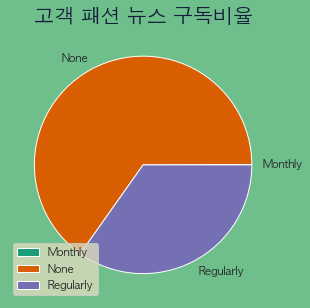

In [226]:

f, ax = plt.subplots(figsize = (5, 5), facecolor = sup_facecolor)
ax.pie(fashion_news['total_customer'],
       labels = fashion_news['fashion_news_frequency'],
       colors = colors)
plt.legend(loc = "lower left")
plt.title('고객 패션 뉴스 구독비율', 
          size = 20, color = fontcolor);

구독하지 않는 고객이 과반수 이상이였고, 30% 정도가 정기적으로 구독하고 있는 것 으로 나왔다. 

'Monthly' 로 응답한 고개들은 극히 일부였다

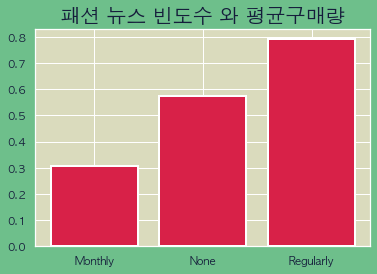

In [236]:
fig, ax = plt.subplots(facecolor= sup_facecolor)
fig.set_size_inches(6,4)
ax.bar(fashion_news['fashion_news_frequency'], fashion_news['avg_purchased'], color= plotcolor, linewidth=2)
ax.set_title('패션 뉴스 빈도수 와 평균구매량', color = fontcolor, size = 20, fontweight = 'bold')
plt.xticks(color = fontcolor)
plt.yticks(color = fontcolor)
plt.show()


정기적으로 패션 뉴스를 구독하는 고객이 평균 구매량이 비구독자보다 1.4배 높았다

고객들에게 패션 뉴스 구독을 장려하는 것이 매출증대 측면에서 하나의 솔루션이 될 수 있다

Monthly 그룹은 전체 고객 중 0.1% 이하이므로 유의미한 결과값이 아니라고 보여진다

### 멤버상태 분석
- 멤버상태별 고객 수
- 멤버상태별 1인당 평균 구매량

In [310]:
status_grouped = trans_cus_merged.groupby('club_member_status').agg({'club_member_status' : 'count', 'purchased_amt' : 'mean'})
status_grouped.rename(columns = {'club_member_status': 'total_customer'}, inplace = True)
status_grouped.sort_values('total_customer', ascending = False, inplace = True)
status_grouped

,total_customer,purchased_amt
club_member_status,,
ACTIVE,1272491,0.682869
PRE-CREATE,92960,0.215665
LEFT CLUB,467,0.553119


In [321]:
print(100 -(1272491+92960)/(1272491+92960+467) *100)

0.03418946086075891


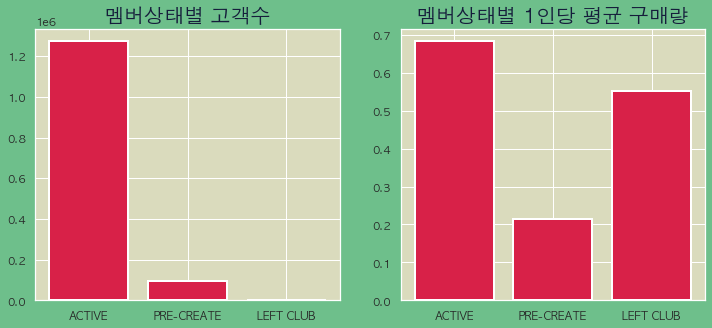

In [315]:
fig, ax = plt.subplots(1, 2, facecolor= sup_facecolor , squeeze = False)
fig.set_size_inches(12,5)

ax[0, 0].bar(status_grouped.index, status_grouped['total_customer'], color= plotcolor, linewidth=2)
ax[0, 0].set_title('멤버상태별 고객수', color = fontcolor, size = 20, fontweight = 'bold')

ax[0, 1].bar(status_grouped.index, status_grouped['purchased_amt'], color= plotcolor, linewidth=2)
ax[0, 1].set_title('멤버상태별 1인당 평균 구매량', color = fontcolor, size = 20, fontweight = 'bold')


plt.show()

ACTIVE(활성회원)로 분류된 소비자가 PRE-CREATE(휴면회원)보다 13배정도 많았다

활성회원이 휴면회원보다 평균적으로 3.1배 많이 소비하였다

탈퇴회원은 총 467명이며 탈퇴율은 0.034% 로 매우 낮았다

### 가장많이 배송받는 주소
- 최상위 배송지 배송 점유율

In [331]:
postal_grouped = trans_cus_merged.groupby('postal_code').count()[['customer_id']].reset_index()
postal_grouped.sort_values('customer_id', ascending = False, inplace =True)
postal_grouped.rename(columns= {'customer_id' : 'total_customer'})
postal_grouped.head()

,postal_code,customer_id
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156


가장 상위에 보이는 주소와 차상위의 주소의 배송량의 격차가 두드러진다

최상위 배송지의 배송점유율을 비교해보자

In [333]:
postal_grouped['top_post'] = '0'
postal_grouped.iloc[0,-1] = '1'
postal_grouped.head()

,postal_code,customer_id,top_post
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,1
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,0
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,0
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,0
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,0


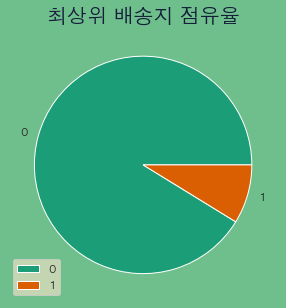

In [366]:
top_post = postal_grouped.groupby('top_post').sum()[['customer_id']].reset_index()
top_post.rename(columns = {'customer_id' : 'total_customer'}, inplace = True)

f, ax = plt.subplots(figsize = (5, 5), facecolor = sup_facecolor)
ax.pie(top_post['total_customer'],
       labels = top_post['top_post'],
       colors = colors)
plt.legend(loc = "lower left")
plt.title('최상위 배송지 점유율', 
          size = 20, color = fontcolor);


최상위 배송지의 배송 점유율이 9.6퍼센트가 나왔다

규모로 보았을때 개인 주소지라기보단 물류센터 혹은 관련시설임을 미루어 짐작 할 수 있다

,top_post,total_customer
0,0,1251677
1,1,120303
